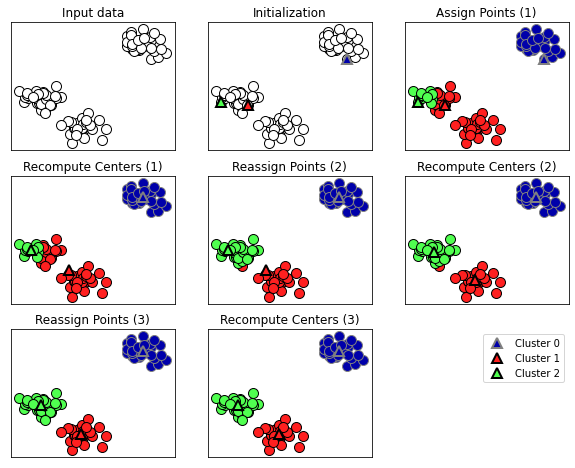

In [1]:
# kmeans 알고리즙에 대한 설명
%matplotlib inline 
import mglearn
mglearn.plots.plot_kmeans_algorithm()

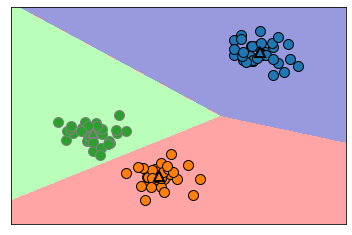

In [2]:
# kmeans 경계 표시
mglearn.plots.plot_kmeans_boundaries()

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]


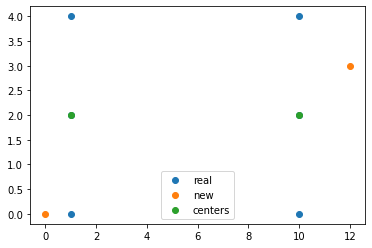

In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

X=np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])
kmeans=KMeans(n_clusters=2, random_state=0).fit(X) # 2개의 클러스터로 구분
print(kmeans.labels_) # 모형이 분류한 라벨
X_new=np.array([[0,0],[12,3]]) # 새로운 값에 대한 분류
print(kmeans.predict(X_new))
print(kmeans.cluster_centers_) # 중심좌표

plt.scatter(X[:,0], X[:,1], label='real')
plt.scatter(X_new[:,0], X_new[:,1], label='new')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label='centers')
plt.legend()

In [5]:
from sklearn.datasets import make_blobs

X, y=make_blobs(random_state=1) # 인위적인 2차원 데이터셋
model=KMeans(n_clusters=3) # 군집 모형 생성
model.fit(X)

KMeans(n_clusters=3)

In [6]:
# 실제값
lbl=model.labels_
print(lbl)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [12]:
# 예측값
pred=model.predict(X)
print(pred)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [10]:
# 모델의 정확도
import sklearn.metrics as sm
sm.accuracy_score(y, pred)

0.0

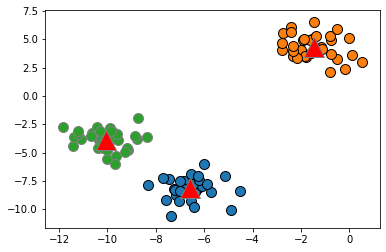

In [13]:
# 3개의 클러스터를 산점도로 표현
mglearn.discrete_scatter(X[:,0], X[:,1], lbl, markers='o')
mglearn.discrete_scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], [0,1,2], markers='^',
c='r', s=20)

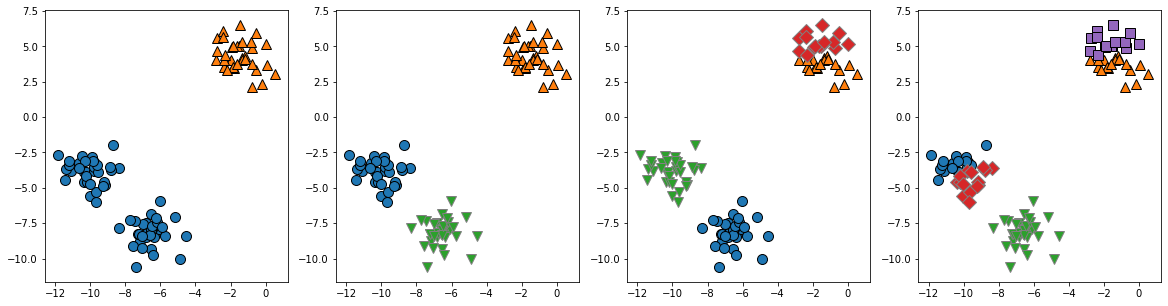

In [14]:
# 같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과다 달라질 수 있음
fig, axes=plt.subplots(1, 4, figsize=(20,5)) # 1행 4열 서브 플롯 생성
# 2, 3, 4, 5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls=kmeans.labels_
    mglearn.discrete_scatter(X[:,0], X[:,1], lbls, ax=axes[idx])
    idx+=1